# Data Science Program Online - Week#2

## *Think about using `Numpy`, `Pandas` and any visualization libs (e.g., Matplotlib, Seaborn etc) for all solutions. Always discuss your solutions.*

## `US_Baby_Names` Dataset

In [1]:
import pandas as pd
import matplotlib. pyplot as plt

In [2]:
import pandas as pd

baby = pd.read_csv('US_Baby_Names_right.csv')
baby

Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]

Step 1: What are the percentages of male and female in the dataset?

In [3]:
t = len(baby['Gender'])
f = len(baby[baby['Gender']=='F'])
f_p = f/t
print('The percentages of male and female in the dataset are %.2f%% and %.2f%% respectively.'%(1-f_p,f_p))

The percentages of male and female in the dataset are 0.45% and 0.55% respectively.


Step 2: How many different names exist in the dataset?

In [4]:
n = baby['Name'].unique()
print('Dataset has %i different names.'%len(n))

Dataset has 17632 different names.


Step 3: What is the name with most occurrences?  Plot histogram of names.

In [5]:
p = baby['Name'].value_counts()
m = p[p==p.max()].index.tolist()
print('%s is the name with most occurrences of %i times.'%(m[0],p.max()))

Riley is the name with most occurrences of 1112 times.


In [6]:
print(p[:100])

Riley        1112
Avery        1080
Jordan       1073
Peyton       1064
Hayden       1049
             ... 
Jaylen        591
Madison       588
Elliott       587
Spencer       583
Alexander     579
Name: Name, Length: 100, dtype: int64


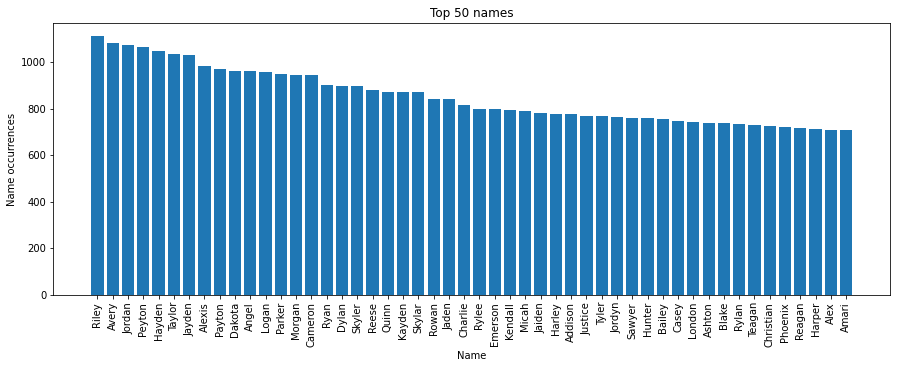

In [27]:
plt.figure(figsize=(15,5))
plt.bar(p[:50].index,p[:50])
plt.ylabel('Name occurrences')
plt.xlabel('Name')
plt.title('Top 50 names')
plt.xticks(rotation=90)
plt.show()

Step 4: Get a summary with the mean, min, max, std and quartiles of names.

In [8]:
print(baby['Name'].value_counts().describe())

count    17632.000000
mean        57.644907
std        122.029964
min          1.000000
25%          2.000000
50%          8.000000
75%         39.000000
max       1112.000000
Name: Name, dtype: float64


## `Online_Retail` Dataset

In [9]:
onl = pd.read_csv('Online_Retail.csv',encoding = "ISO-8859-1")
onl

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

Step 1: Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

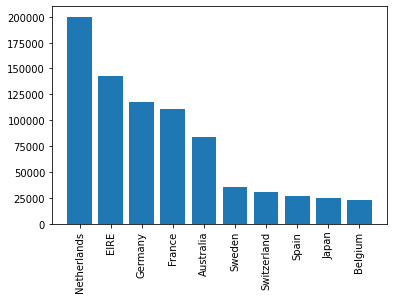

In [10]:
top = onl.groupby(['Country']).agg({'Quantity':'sum'})
top = top.sort_values(by = 'Quantity', ascending = False)
h = top[top['Quantity'].index != 'United Kingdom'][:10]
plt.bar(h.index,h['Quantity'])
plt.xticks(rotation=90)

Step 2: Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK

Text(0.5, 0, 'Quantity')

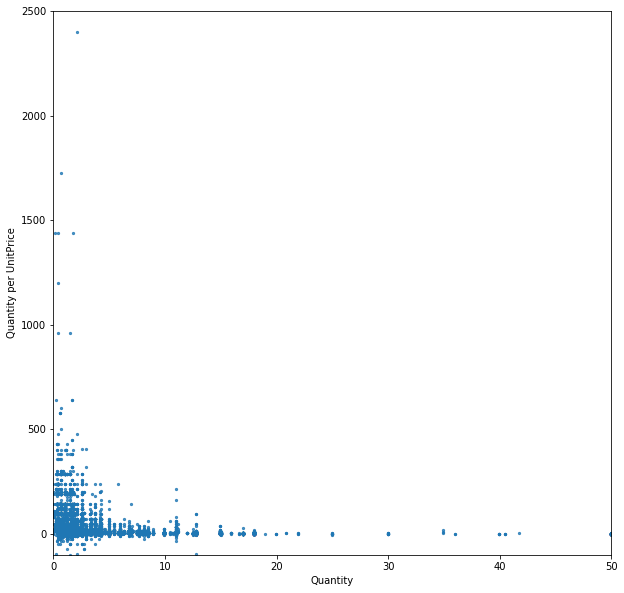

In [26]:
c = list(h.index[:3])
dt = onl[['Quantity','UnitPrice']].set_index(onl.Country).loc[c]
plt.figure(figsize=(10,10))
plt.scatter(dt.UnitPrice,dt.Quantity,alpha=0.8, s=5)
plt.axis([0, 50, -100, 2500])
plt.ylabel('Quantity per UnitPrice')
plt.xlabel('Quantity')

Step 3: Plot a line chart showing revenue (y) per UnitPrice (x).

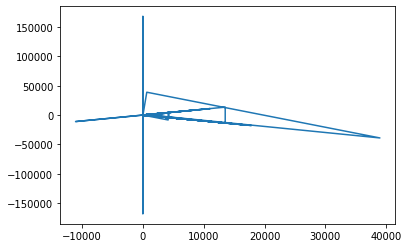

In [12]:
onl['Revenue'] = onl.Quantity * onl.UnitPrice
# onl.groupby(['UnitPrice']).agg({'Revenue':'sum'})
plt.plot(onl.UnitPrice,onl.Revenue)

## `Titanic` Dataset (Week#1 HW)


In [13]:
dt = pd.read_csv('Titanic.csv')
dt

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Step 1. Create a pie chart presenting the male/female proportion

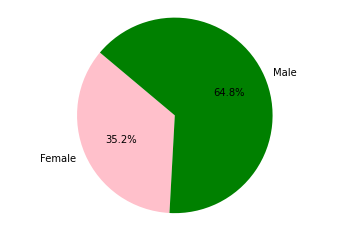

In [14]:
a = dt.groupby('Sex').size()
f= a.female/len(dt)
m= a.male/len(dt)

labels = ['Female', 'Male']
sizes = [f,m]
colors = ['pink', 'green']

# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()


Step 2. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender¶

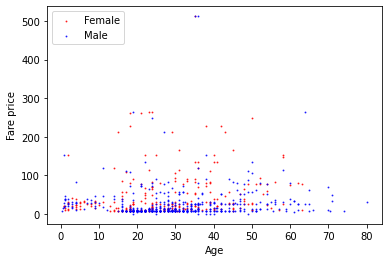

In [15]:
data = dt[['Age','Sex','Fare']]
plt.scatter(dt.Age[dt.Sex == 'female'],dt.Fare[dt.Sex == 'female'],alpha=0.8, s = 0.8, c = 'red', label="Female")
plt.scatter(dt.Age[dt.Sex == 'male'],dt.Fare[dt.Sex == 'male'],alpha=0.8, s = 0.8, c = 'blue', label="Male")
plt.ylabel('Fare price')
plt.xlabel('Age')
plt.legend(loc="upper left")
plt.show()

Step 3. Create a histogram with the Fare payed

## `appl_1980_2014` dataset (Apple Stock Dataset)

Step 1. Load the dataset and transform the Date column as a datetime type

In [16]:
app = pd.read_csv('appl_1980_2014.csv')

In [17]:
app['Date'] = app['Date'].astype('datetime64')
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


Step 2: Is there any duplicate dates? Then set the date as the index.

In [18]:
app.set_index('Date', inplace = True)
app.head(3)

Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03

Step 3: Get the last business day of each month

In [19]:
app['year'] = app.index.year
app['month'] = app.index.month
app['date'] = app.index.day
lst_bdm = app[['year', 'month','date']].pivot_table(index = 'year', columns = 'month', values = 'date', aggfunc = 'max')
lst_bdm

month    1     2     3     4     5     6     7     8     9     10    11    12
year                                                                         
1980    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0
1981   30.0  27.0  31.0  30.0  29.0  30.0  31.0  31.0  30.0  30.0  30.0  31.0
1982   29.0  26.0  31.0  30.0  28.0  30.0  30.0  31.0  30.0  29.0  30.0  31.0
1983   31.0  28.0  31.0  29.0  31.0  30.0  29.0  31.0  30.0  31.0  30.0  30.0
1984   31.0  29.0  30.0  30.0  31.0  29.0  31.0  31.0  28.0  31.0  30.0  31.0
1985   31.0  28.0  29.0  30.0  31.0  28.0  31.0  30.0  30.0  31.0  29.0  31.0
1986   31.0  28.0  31.0  30.0  30.0  30.0  31.0  29.0  30.0  31.0  28.0  31.0
1987   30.0  27.0  31.0  30.0  29.0  30.0  31.0  31.0  30.0  30.0  30.0  31.0
1988   29.0  29.0  31.0  29.0  31.0  30.0  29.0  31.0  30.0  31.0  30.0  30.0
1989   31.0  28.0  31.0  28.0  31.0  30.0  31.0  31.0  29.0  31.0  30.0  29.0
1990   31.0  28.0  30.0  30.0  31.0  29.0  31.0  31.0  28.0  31.0  30.0  31.0
1991   31.0  28.0  28.0  30.0  31.0  28.0  31.0  30.0  30.0  31.0  29.0  31.0
1992   31.0  28.0  31.0  30.0  29.0  30.0  31.0  31.0  30.0  30.0  30.0  31.0
1993   29.0  26.0  31.0  30.0  28.0  30.0  30.0  31.0  30.0  29.0  30.0  31.0
1994   31.0  28.0  31.0  29.0  31.0  30.0  29.0  31.0  30.0  31.0  30.0  30.0
1995   31.0  28.0  31.0  28.0  31.0  30.0  31.0  31.0  29.0  31.0  30.0  29.0
1996   31.0  29.0  29.0  30.0  31.0  28.0  31.0  30.0  30.0  31.0  29.0  31.0
1997   31.0  28.0  31.0  30.0  30.0  30.0  31.0  29.0  30.0  31.0  28.0  31.0
1998   30.0  27.0  31.0  30.0  29.0  30.0  31.0  31.0  30.0  30.0  30.0  31.0
1999   29.0  26.0  31.0  30.0  28.0  30.0  30.0  31.0  30.0  29.0  30.0  31.0
2000   31.0  29.0  31.0  28.0  31.0  30.0  31.0  31.0  29.0  31.0  30.0  29.0
2001   31.0  28.0  30.0  30.0  31.0  29.0  31.0  31.0  28.0  31.0  30.0  31.0
2002   31.0  28.0  28.0  30.0  31.0  28.0  31.0  30.0  30.0  31.0  29.0  31.0
2003   31.0  28.0  31.0  30.0  30.0  30.0  31.0  29.0  30.0  31.0  28.0  31.0
2004   30.0  27.0  31.0  30.0  28.0  30.0  30.0  31.0  30.0  29.0  30.0  31.0
2005   31.0  28.0  31.0  29.0  31.0  30.0  29.0  31.0  30.0  31.0  30.0  30.0
2006   31.0  28.0  31.0  28.0  31.0  30.0  31.0  31.0  29.0  31.0  30.0  29.0
2007   31.0  28.0  30.0  30.0  31.0  29.0  31.0  31.0  28.0  31.0  30.0  31.0
2008   31.0  29.0  31.0  30.0  30.0  30.0  31.0  29.0  30.0  31.0  28.0  31.0
2009   30.0  27.0  31.0  30.0  29.0  30.0  31.0  31.0  30.0  30.0  30.0  31.0
2010   29.0  26.0  31.0  30.0  28.0  30.0  30.0  31.0  30.0  29.0  30.0  31.0
2011   31.0  28.0  31.0  29.0  31.0  30.0  29.0  31.0  30.0  31.0  30.0  30.0
2012   31.0  29.0  30.0  30.0  31.0  29.0  31.0  31.0  28.0  31.0  30.0  31.0
2013   31.0  28.0  28.0  30.0  31.0  28.0  31.0  30.0  30.0  31.0  29.0  31.0
2014   31.0  28.0  31.0  30.0  30.0  30.0   8.0   NaN   NaN   NaN   NaN   NaN

Step 4: Plot the 'Adj Close' value. 

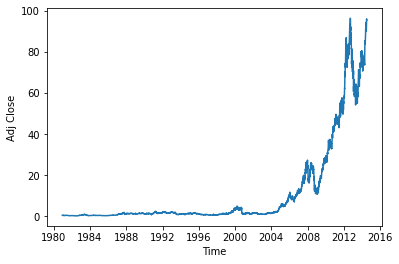

In [20]:
plt.plot(app.index, app['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel('Time')
plt.show()

### Other Problems

plotly.py is an interactive, open-source, and browser-based graphing library for Python (https://github.com/plotly/plotly.py). Please use plotly for the following questions.

University of Liverpool - Ion Switching is a recent Kaggle competition (https://www.kaggle.com/c/liverpool-ion-switching). In this competition, you will be predicting the number of `open_channels` present, based on electrophysiological signal data.

Work with training data for the following questions. (`train.csv`)


In [21]:
ul = pd.read_csv('train.csv')
ul.head(5)

time  signal  open_channels
0  0.0001 -2.7600              0
1  0.0002 -2.8557              0
2  0.0003 -2.4074              0
3  0.0004 -3.1404              0
4  0.0005 -3.1525              0

1. Plot `signal` vs `time` for all data.

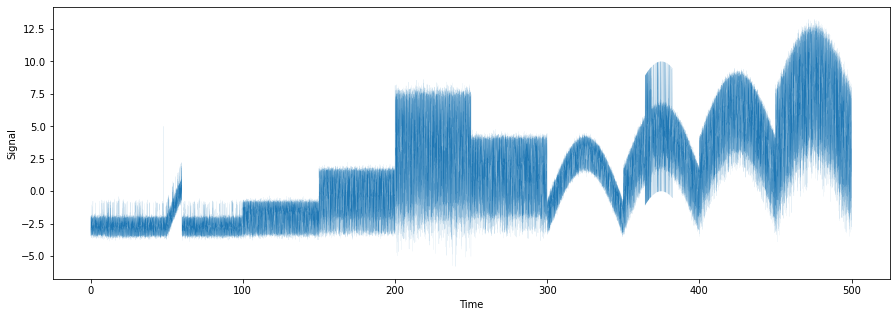

In [28]:
plt.figure(figsize=(15,5))
plt.plot(ul.time,ul.signal,linewidth=0.05)
plt.ylabel('Signal')
plt.xlabel('Time')
plt.show()


2. Plot `open_channels` vs `time` for all data.

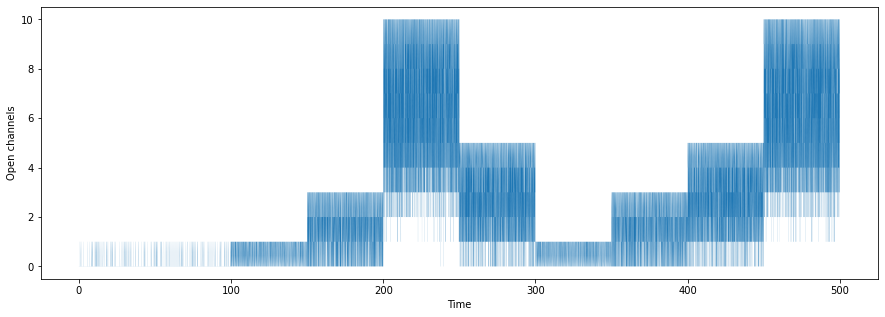

In [23]:
plt.figure(figsize=(15,5))
plt.plot(ul.time,ul.open_channels,linewidth=0.05)
plt.ylabel('Open channels')
plt.xlabel('Time')
plt.show()

3. Plot some sample signal snippets (at least 6 in one graph). Each snippet includes 100 time steps.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ul.time,ul.signal,linewidth=0.05)
plt.ylabel('Signal')
plt.xlabel('Time')
plt.show()

4. Using any moving average method with window size of your choice, please plot moving average signals over the 3rd question. (if you don't know `moving average`, please see https://en.wikipedia.org/wiki/Moving_average or slack us)

5. Instead of using moving average, please use exponential smoothing with parameters of your choise for question 4 above.

6. The signals are divided into 10 batches with equal size according time. Plot histogram of `open_channel` for each batch.

7. Plot signal mean vs open channels.

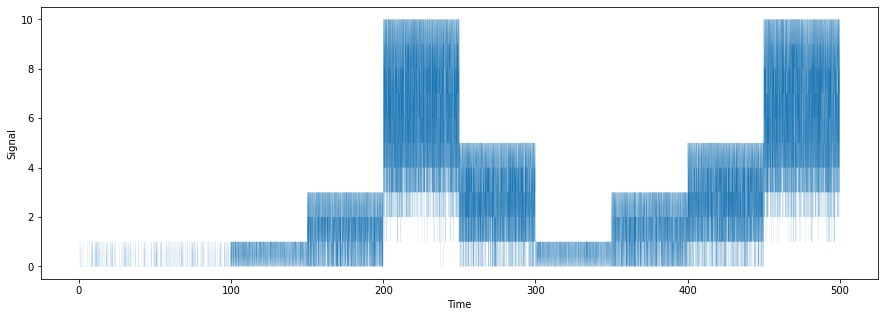

In [30]:
plt.figure(figsize=(15,5))
plt.plot(ul.time,ul.open_channels,linewidth=0.05)
plt.plot(ul.time,ul.open_channels,linewidth=0.05)
plt.ylabel('Signal')
plt.xlabel('Time')
plt.show()

8. Plot signal median vs open channels.

## Stock Price API

- Use any Stock Price APIs (you can use this one: https://www.alphavantage.co/)
- Get the stock price of any company of your choice in the last two years (or more)
- Plot price vs time

In [24]:
import pandas as pd
import pandas_datareader
from pandas_datareader import data, wb
import datetime as dt

start = dt.datetime(2018, 1, 1)
end = pd.datetime.today()
df = data.DataReader("AAPL", start=start, end=end,data_source='yahoo')
df.head(3)

/home/nhoxkhjjunammun/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/home/nhoxkhjjunammun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


High         Low        Open       Close      Volume  \
Date                                                                     
2018-01-02  172.300003  169.259995  170.160004  172.259995  25555900.0   
2018-01-03  174.550003  171.960007  172.529999  172.229996  29517900.0   
2018-01-04  173.470001  172.080002  172.539993  173.029999  22434600.0   

             Adj Close  
Date                    
2018-01-02  166.353714  
2018-01-03  166.324722  
2018-01-04  167.097290

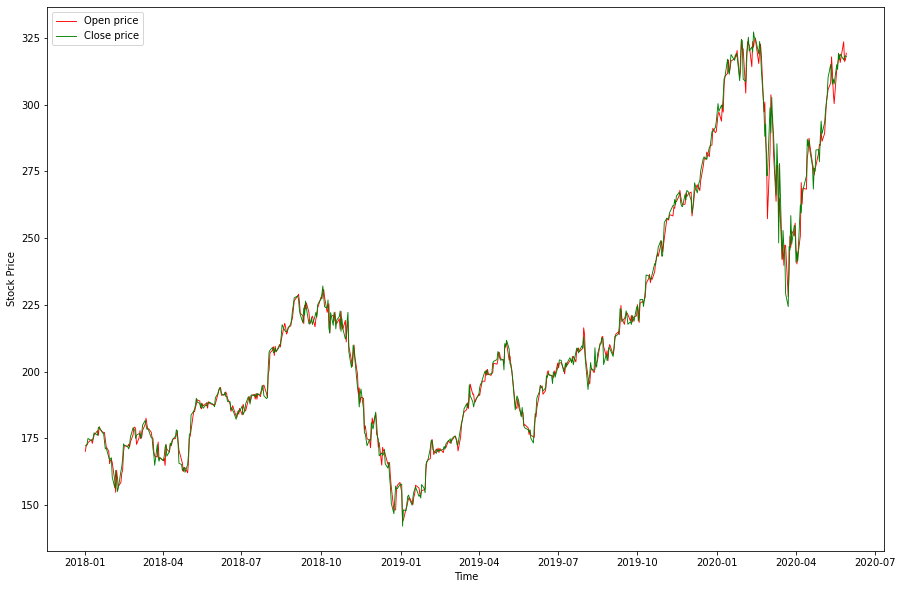

In [25]:
plt.figure(figsize=(15,10))
plt.plot(df.index,df.Open,c = 'red',linewidth=0.9, label="Open price")
plt.plot(df.index,df.Close,c = 'green',linewidth=0.9, label="Close price")
plt.legend(loc="upper left")
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()